In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
             'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
print(pima.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [9]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols]
y = pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf_unpruned = DecisionTreeClassifier(random_state=42)
clf_unpruned.fit(X_train, y_train)

clf_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_pruned.fit(X_train, y_train)

y_pred_pruned = clf_pruned.predict(X_test)
print("Pruned Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_pruned))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_pruned))
print("Precision:", metrics.precision_score(y_test, y_pred_pruned))
print("Recall:", metrics.recall_score(y_test, y_pred_pruned))
print("F1 Score:", metrics.f1_score(y_test, y_pred_pruned))

Pruned Tree Accuracy: 0.7662337662337663
Confusion Matrix:
 [[123  23]
 [ 31  54]]
Precision: 0.7012987012987013
Recall: 0.6352941176470588
F1 Score: 0.6666666666666666


Text(0.5, 1.0, 'Decision Tree (Before Pruning)')

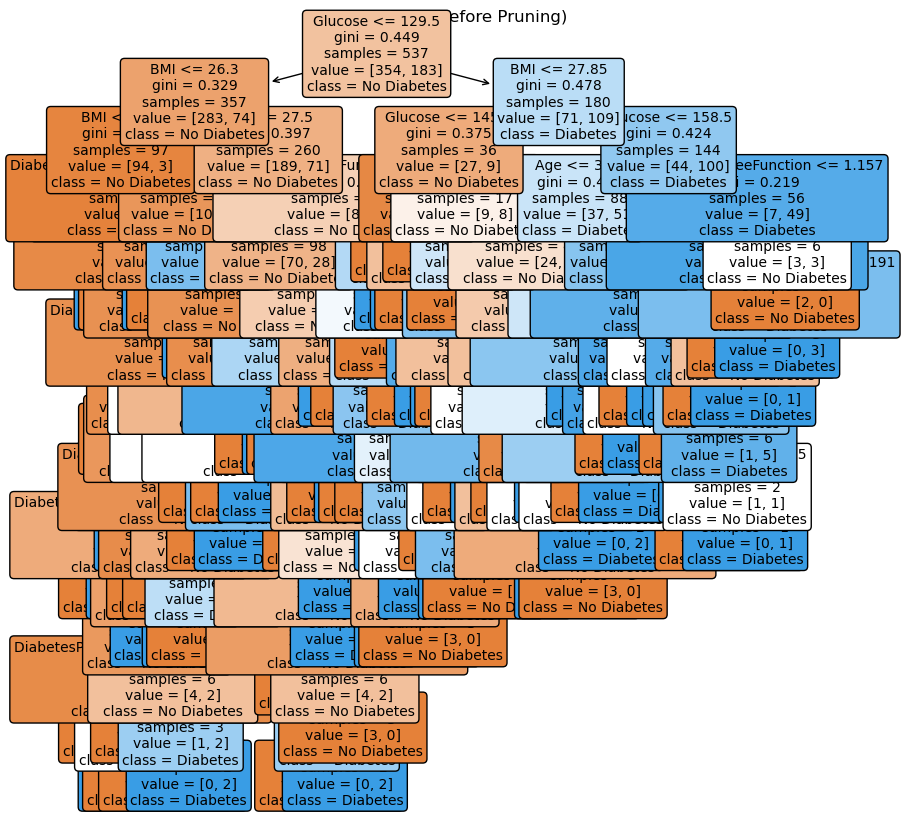

In [10]:
plt.figure(figsize=(20, 10))


plt.subplot(1, 2, 1)
plot_tree(clf_unpruned,
          feature_names=feature_cols,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree (Before Pruning)")


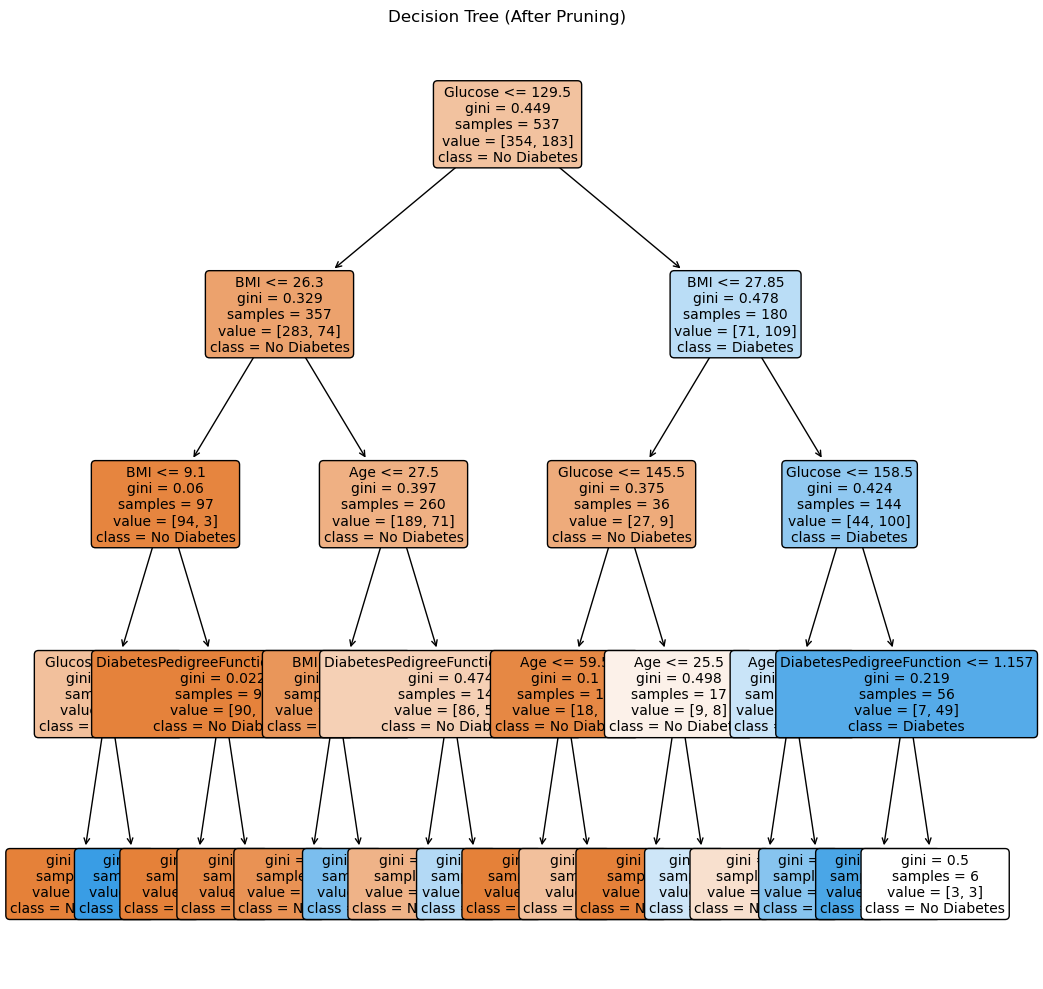

In [13]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
plot_tree(clf_pruned,
          feature_names=feature_cols,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree (After Pruning)")

plt.tight_layout()
plt.show()